In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
arabica = pd.read_csv("../data/archive/arabica_data_cleaned.csv")
robusta = pd.read_csv("../data/archive/robusta_data_cleaned.csv")
merged = pd.read_csv("../data/archive/merged_data_cleaned.csv")

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression(fit_intercept=True)

In [72]:
print(arabica.shape)

(1311, 44)


In [73]:
print(arabica.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [74]:
print(arabica.dtypes)

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [75]:
#하나의 행 데이터의 특징만을 알고 싶을떄
print(arabica.Mill.dtype)

object


In [76]:
print(arabica.describe())

        Unnamed: 0  Number.of.Bags        Aroma       Flavor   Aftertaste  \
count  1311.000000     1311.000000  1311.000000  1311.000000  1311.000000   
mean    656.000763      153.887872     7.563806     7.518070     7.397696   
std     378.598733      129.733734     0.378666     0.399979     0.405119   
min       1.000000        0.000000     0.000000     0.000000     0.000000   
25%     328.500000       14.500000     7.420000     7.330000     7.250000   
50%     656.000000      175.000000     7.580000     7.580000     7.420000   
75%     983.500000      275.000000     7.750000     7.750000     7.580000   
max    1312.000000     1062.000000     8.750000     8.830000     8.670000   

           Acidity         Body      Balance   Uniformity   Clean.Cup  \
count  1311.000000  1311.000000  1311.000000  1311.000000  1311.00000   
mean      7.533112     7.517727     7.517506     9.833394     9.83312   
std       0.381599     0.359213     0.406316     0.559343     0.77135   
min       0.00

In [77]:
#평균 수치 기록법

print(arabica.mean())
print('\n')
print(arabica['Balance'].mean())
print(arabica.Balance.mean())
print("\n")
print(arabica[['Balance', 'Aroma']].mean())

Unnamed: 0               656.000763
Number.of.Bags           153.887872
Aroma                      7.563806
Flavor                     7.518070
Aftertaste                 7.397696
Acidity                    7.533112
Body                       7.517727
Balance                    7.517506
Uniformity                 9.833394
Clean.Cup                  9.833120
Sweetness                  9.903272
Cupper.Points              7.497864
Total.Cup.Points          82.115927
Moisture                   0.088863
Category.One.Defects       0.426392
Quakers                    0.177099
Category.Two.Defects       3.591915
altitude_low_meters     1759.548954
altitude_high_meters    1808.843803
altitude_mean_meters    1784.196379
dtype: float64


7.517505720823799
7.517505720823799


Balance    7.517506
Aroma      7.563806
dtype: float64


C:\Users\pjh23\AppData\Local\Temp\ipykernel_3284\423301747.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(arabica.mean())


In [154]:
merged_data = merged[["Species",'Aroma','Flavor','Acidity','Body','Balance','Uniformity','Sweetness',
                     'Total.Cup.Points','Moisture']]

In [155]:
print(merged_data)

      Species  Aroma  Flavor  Acidity  Body  Balance  Uniformity  Sweetness  \
0     Arabica   8.67    8.83     8.75  8.50     8.42       10.00      10.00   
1     Arabica   8.75    8.67     8.58  8.42     8.42       10.00      10.00   
2     Arabica   8.42    8.50     8.42  8.33     8.42       10.00      10.00   
3     Arabica   8.17    8.58     8.42  8.50     8.25       10.00      10.00   
4     Arabica   8.25    8.50     8.50  8.42     8.33       10.00      10.00   
...       ...    ...     ...      ...   ...      ...         ...        ...   
1334  Robusta   7.75    7.58     7.58  5.08     7.83       10.00       7.75   
1335  Robusta   7.50    7.67     7.75  5.17     5.25       10.00       8.42   
1336  Robusta   7.33    7.33     7.42  7.50     7.17        9.33       7.42   
1337  Robusta   7.42    6.83     7.17  7.25     7.00        9.33       7.08   
1338  Robusta   6.75    6.67     6.83  6.92     6.83        9.33       6.67   

      Total.Cup.Points  Moisture  
0               

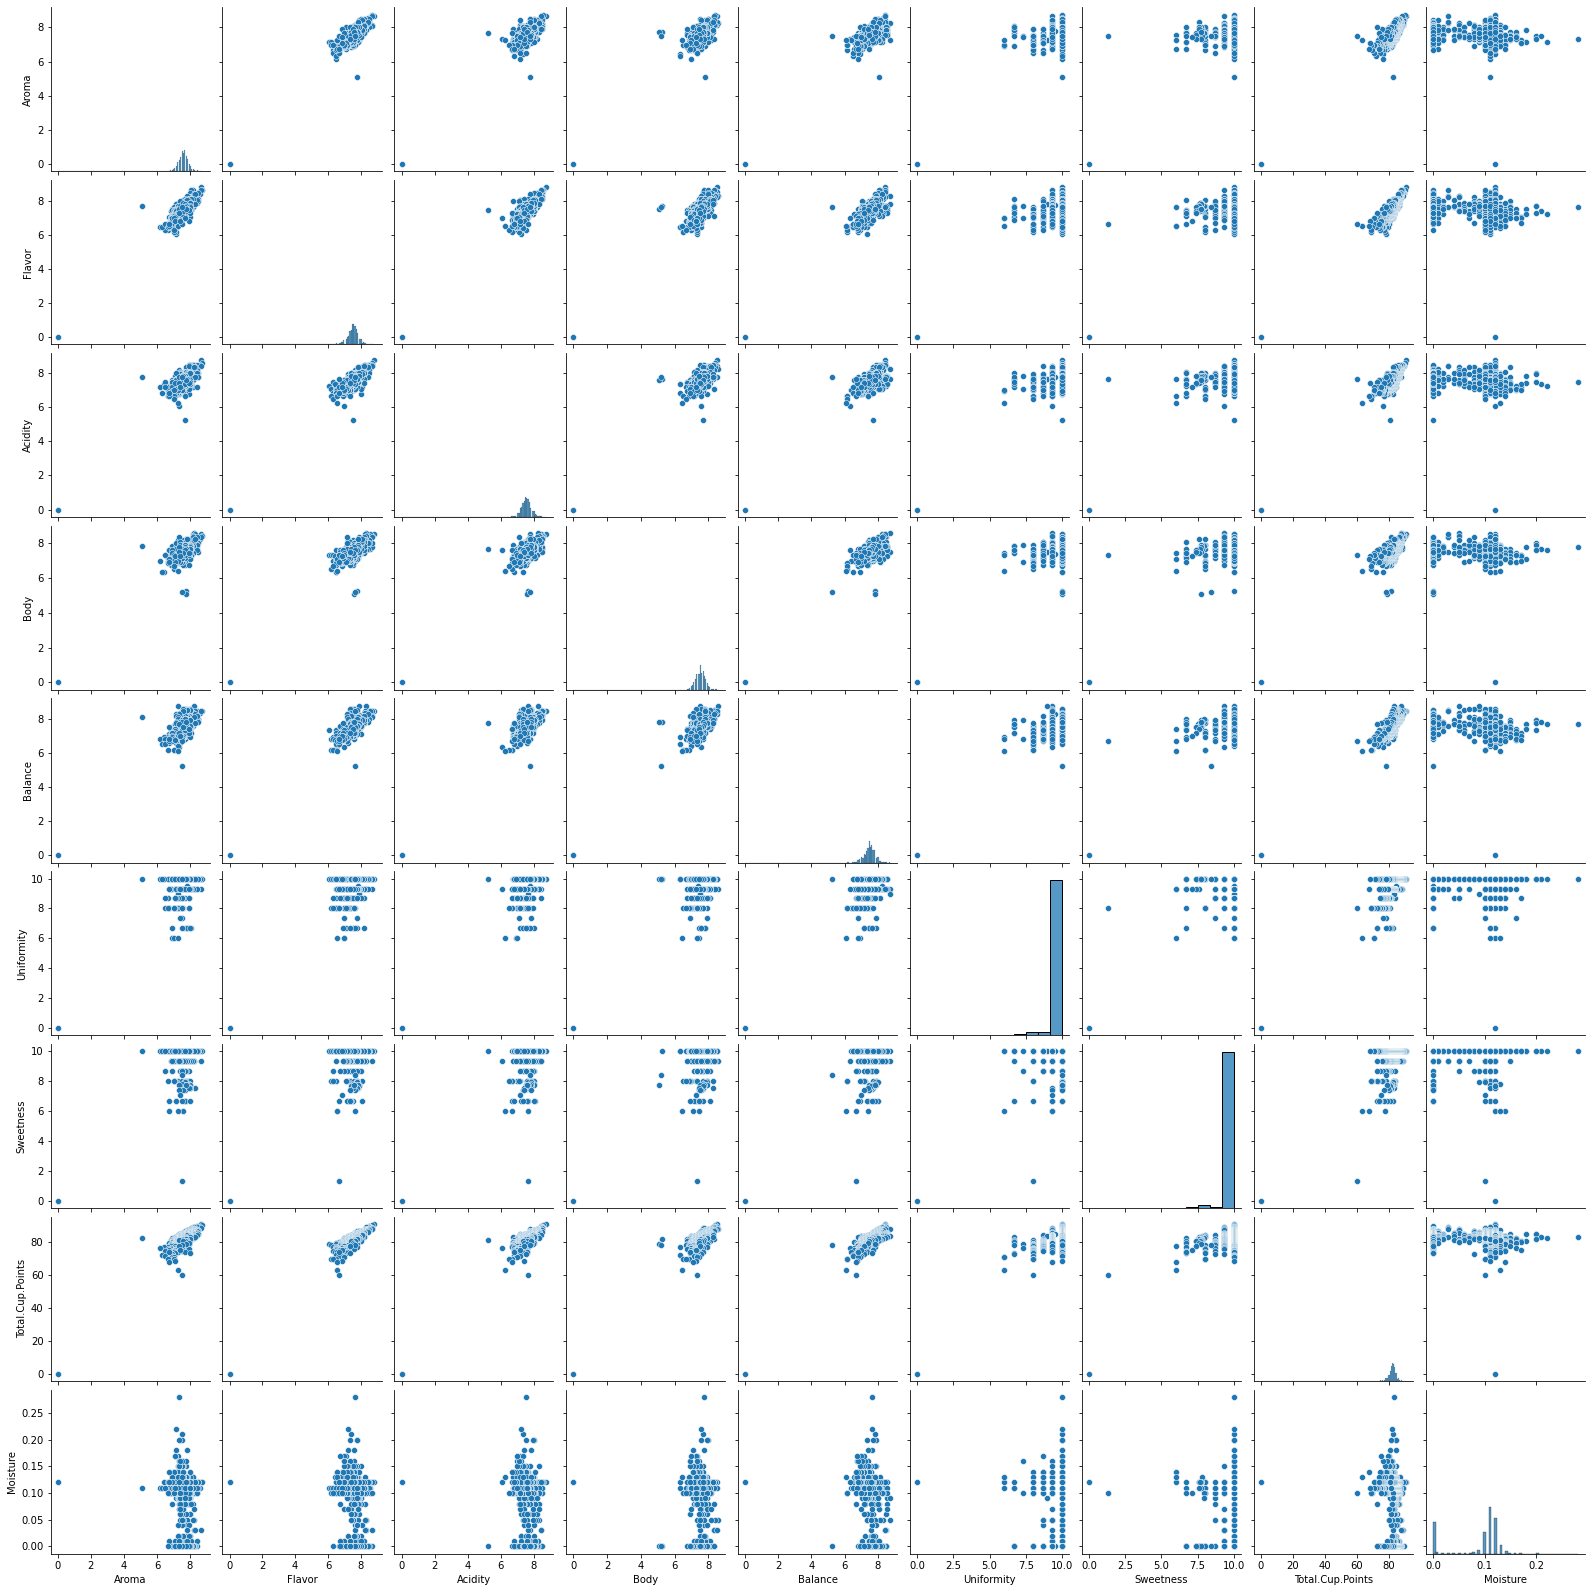

In [156]:
choeck_data = sns.pairplot(merged_data)
plt.show()

In [157]:
merged_data.corr()

,Aroma,Flavor,Acidity,Body,Balance,Uniformity,Sweetness,Total.Cup.Points,Moisture
Aroma,1.000000,0.813259,0.723582,0.673006,0.708634,0.366578,0.253493,0.791627,-0.134127
Flavor,0.813259,1.000000,0.816688,0.735720,0.792290,0.410923,0.291065,0.874279,-0.145201
Acidity,0.723582,0.816688,1.000000,0.706435,0.733017,0.375383,0.261854,0.797024,-0.129079
Body,0.673006,0.735720,0.706435,1.000000,0.757597,0.326879,0.268342,0.757165,-0.147651
Balance,0.708634,0.792290,0.733017,0.757597,1.000000,0.400915,0.283272,0.828502,-0.199843
Uniformity,0.366578,0.410923,0.375383,0.326879,0.400915,1.000000,0.451083,0.656454,0.013792
Sweetness,0.253493,0.291065,0.261854,0.268342,0.283272,0.451083,1.000000,0.554029,0.072699
Total.Cup.Points,0.791627,0.874279,0.797024,0.757165,0.828502,0.656454,0.554029,1.000000,-0.117722
Moisture,-0.134127,-0.145201,-0.129079,-0.147651,-0.199843,0.013792,0.072699,-0.117722,1.000000


In [159]:
X = merged_data.drop(['Species',"Total.Cup.Points"], axis=1)
X.head()

,Aroma,Flavor,Acidity,Body,Balance,Uniformity,Sweetness,Moisture
0,8.67,8.83,8.75,8.50,8.42,10.0,10.0,0.12
1,8.75,8.67,8.58,8.42,8.42,10.0,10.0,0.12
2,8.42,8.50,8.42,8.33,8.42,10.0,10.0,0.00
3,8.17,8.58,8.42,8.50,8.25,10.0,10.0,0.11
4,8.25,8.50,8.50,8.42,8.33,10.0,10.0,0.12


In [160]:
y = merged_data['Total.Cup.Points']
y.head()

0    90.58
1    89.92
2    89.75
3    89.00
4    88.83
Name: Total.Cup.Points, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [179]:
lr.fit(X_train, y_train)

LinearRegression()

In [180]:
lr.coef_

array([ 1.2221916 ,  2.58524146,  0.99787734,  0.70505287,  1.66401491,
        1.55996919,  1.31009664, -1.01585002])

In [181]:
X_train.columns

Index(['Aroma', 'Flavor', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Sweetness', 'Moisture'],
      dtype='object')

In [182]:
lr.intercept_

-0.08425262065647132

In [183]:
y_pred = lr.predict(X_test)

In [184]:
from sklearn.metrics import mean_squared_error

In [185]:
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

0.91

In [189]:
merged_data

,Species,Aroma,Flavor,Acidity,Body,Balance,Uniformity,Sweetness,Total.Cup.Points,Moisture
0,Arabica,8.67,8.83,8.75,8.50,8.42,10.00,10.00,90.58,0.12
1,Arabica,8.75,8.67,8.58,8.42,8.42,10.00,10.00,89.92,0.12
2,Arabica,8.42,8.50,8.42,8.33,8.42,10.00,10.00,89.75,0.00
3,Arabica,8.17,8.58,8.42,8.50,8.25,10.00,10.00,89.00,0.11
4,Arabica,8.25,8.50,8.50,8.42,8.33,10.00,10.00,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,7.75,7.58,7.58,5.08,7.83,10.00,7.75,78.75,0.00
1335,Robusta,7.50,7.67,7.75,5.17,5.25,10.00,8.42,78.08,0.00
1336,Robusta,7.33,7.33,7.42,7.50,7.17,9.33,7.42,77.17,0.00
1337,Robusta,7.42,6.83,7.17,7.25,7.00,9.33,7.08,75.08,0.10


In [192]:
merged_corr = merged_data.corr()
merged_corr.loc[np.abs(merged_corr['Total.Cup.Points']) > 0.3, 'Total.Cup.Points']

Aroma               0.791627
Flavor              0.874279
Acidity             0.797024
Body                0.757165
Balance             0.828502
Uniformity          0.656454
Sweetness           0.554029
Total.Cup.Points    1.000000
Name: Total.Cup.Points, dtype: float64